In [ ]:
# Célula 1: Importação de Bibliotecas Essenciais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurações para melhorar a visualização de gráficos (opcional)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

# Análise da Presença e Influência dos Dados no Setor Imobiliário de São Paulo

## 1. Introdução

Este trabalho tem como objetivo explorar a presença e a influência dos dados no setor imobiliário da cidade de São Paulo, utilizando um ciclo completo de ciência de dados. Abordaremos as fases de coleta, organização, exploração e análise de um conjunto de dados de apartamentos, buscando identificar os principais fatores que impactam o preço dos imóveis e como a localização se manifesta nesse cenário.


**Questões de Pesquisa:**
* Como as características dos imóveis (área, número de quartos/banheiros, vagas de estacionamento) influenciam seu preço de venda?
* Qual o impacto da localização (bairro) na variação do preço por metro quadrado dos apartamentos em São Paulo?
* Existem outros fatores, como o tempo de anúncio, que correlacionam com o preço dos imóveis?

In [ ]:
# Célula 2: Carregamento do Dataset
# Carregar o dataset imobiliário de apartamentos de São Paulo
df = pd.read_csv('SaoPaulo_OnlyAppartments.csv')

print("Dataset carregado com sucesso!")

Dataset carregado com sucesso!


## 2. Visão Geral e Inspeção Inicial dos Dados

Antes de qualquer manipulação, é crucial entender a estrutura, o tipo de dados e a presença de valores ausentes no nosso dataset. Esta etapa nos ajuda a planejar as próximas fases de limpeza e preparação.

In [ ]:
# Célula 3: Visualizar as primeiras linhas do DataFrame
print("### Primeiras 5 linhas do Dataset:")
print(df.head())

### Primeiras 5 linhas do Dataset:
           ID          created_date    Price  below_price  Area  \
0  2742871875  2018-05-24T15:02:18Z  2000000        False    62   
1  2670612721  2018-12-18T14:40:10Z  1015680        False    42   
2  2752273106  2018-03-28T09:37:42Z   490000        False    31   
3  2730614854  2022-03-17T20:07:18Z   850000        False    50   
4  2756989746  2018-03-27T23:24:33Z   209100        False    37   

                                              Adress  Bedrooms  Bathrooms  \
0  Alameda Casa Branca 909, Jardim Paulista - São...         1          1   
1  Rua Doutor Guilherme Bannitz 61, Itaim Bibi - ...         1          1   
2  Avenida Professor Francisco Morato 292, Butant...         1          1   
3  Avenida Doutor Cardoso de Melo 04545003, Vila ...         1          1   
4  Rua Serra de São Domingos 100, Vila Carmosina ...         1          1   

   Parking_Spaces extract_date  
0               1   2024-11-22  
1               1   2024-11-22  


In [ ]:
# Célula 4: Obter informações sobre as colunas e tipos de dados
print("\n### Informações Detalhadas do Dataset:")
df.info()


### Informações Detalhadas do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27828 entries, 0 to 27827
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              27828 non-null  int64 
 1   created_date    27828 non-null  object
 2   Price           27828 non-null  int64 
 3   below_price     27828 non-null  bool  
 4   Area            27828 non-null  int64 
 5   Adress          27828 non-null  object
 6   Bedrooms        27828 non-null  int64 
 7   Bathrooms       27828 non-null  int64 
 8   Parking_Spaces  27828 non-null  int64 
 9   extract_date    27828 non-null  object
dtypes: bool(1), int64(6), object(3)
memory usage: 1.9+ MB


In [ ]:
# Célula 5: Estatísticas descritivas das colunas numéricas
# Isso nos dá uma ideia da distribuição, média, desvio padrão e valores mínimo/máximo.
print("\n### Estatísticas Descritivas das Colunas Numéricas (Dados Originais):")
print(df.describe())


### Estatísticas Descritivas das Colunas Numéricas (Dados Originais):
                 ID         Price          Area      Bedrooms     Bathrooms  \
count  2.782800e+04  2.782800e+04  27828.000000  27828.000000  27828.000000   
mean   2.685599e+09  2.037172e+06    136.288163      2.740477      2.831177   
std    2.250889e+08  2.894259e+06     92.053324      0.921697      1.435586   
min    3.641814e+07  1.000000e+05     10.000000      1.000000      1.000000   
25%    2.681157e+09  7.500000e+05     73.000000      2.000000      2.000000   
50%    2.734779e+09  1.319972e+06    112.000000      3.000000      3.000000   
75%    2.750170e+09  2.300000e+06    171.000000      3.000000      4.000000   
max    2.758322e+09  1.220290e+08   3367.000000     20.000000     20.000000   

       Parking_Spaces  
count    27828.000000  
mean         2.153730  
std          2.927744  
min          0.000000  
25%          1.000000  
50%          2.000000  
75%          3.000000  
max        350.000000  


## 3. Preparação e Limpeza de Dados

A qualidade da análise de dados depende diretamente da qualidade dos dados. Nesta seção, realizaremos etapas de limpeza e organização para construir um dataset de trabalho robusto e confiável.

### 3.1. Extração da Informação do Bairro

A coluna `Adress` contém o endereço completo do imóvel. Para analisar a influência da localização, precisamos extrair o nome do bairro de forma padronizada.

In [ ]:
# Célula 6: Extrair o nome do Bairro da coluna 'Adress'
# A lógica tenta dividir a string pelo primeiro ',', depois pelo primeiro '-' e remove espaços extras.
# Se a extração falhar, o bairro será classificado como 'Desconhecido'.
df['Bairro'] = df['Adress'].apply(lambda x: x.split(',')[1].split('-')[0].strip() if pd.notnull(x) and ',' in x and '-' in x.split(',')[1] else 'Desconhecido')

# Verificar a contagem dos bairros mais frequentes, incluindo 'Desconhecido'
print("### Top 10 Bairros (antes da remoção de 'Desconhecido'):")
print(df['Bairro'].value_counts().head(10))

### Top 10 Bairros (antes da remoção de 'Desconhecido'):
Bairro
Desconhecido           1778
Jardim Paulista        1113
Perdizes               1055
Vila Mariana            967
Indianópolis            885
Campo Belo              738
Itaim Bibi              701
Vila Nova Conceição     610
Brooklin Paulista       550
Vila Andrade            540
Name: count, dtype: int64


### 3.2. Tratamento de Colunas de Data

As colunas `created_date` (data de criação do anúncio) e `extract_date` (data da extração do dado) estão como tipo 'object' (string). Para realizar análises temporais, elas precisam ser convertidas para o tipo `datetime`. Também calcularemos a 'idade' do anúncio em dias.

In [ ]:
# Célula 7: Converter colunas de data para o tipo datetime
print("Tipos de dados antes da conversão de datas:")
print(df[['created_date', 'extract_date']].dtypes)

# Convert created_date e remover a informação de fuso horário (tz-localize(None))
df['created_date'] = pd.to_datetime(df['created_date']).dt.tz_localize(None)

# Convert extract_date
df['extract_date'] = pd.to_datetime(df['extract_date'])

print("\nTipos de dados após a conversão de datas:")
print(df[['created_date', 'extract_date']].dtypes)

Tipos de dados antes da conversão de datas:
created_date    object
extract_date    object
dtype: object

Tipos de dados após a conversão de datas:
created_date    datetime64[ns]
extract_date    datetime64[ns]
dtype: object


In [ ]:
# Célula 8: Criar a coluna 'age_of_listing_days' (idade do anúncio em dias)
# Esta coluna representa há quanto tempo o imóvel estava anunciado na data da extração do dado.
df['age_of_listing_days'] = (df['extract_date'] - df['created_date']).dt.days

print("\n### Primeiras linhas com a nova coluna 'age_of_listing_days':")
print(df[['created_date', 'extract_date', 'age_of_listing_days']].head())


### Primeiras linhas com a nova coluna 'age_of_listing_days':
         created_date extract_date  age_of_listing_days
0 2018-05-24 15:02:18   2024-11-22                 2373
1 2018-12-18 14:40:10   2024-11-22                 2165
2 2018-03-28 09:37:42   2024-11-22                 2430
3 2022-03-17 20:07:18   2024-11-22                  980
4 2018-03-27 23:24:33   2024-11-22                 2431


In [ ]:
# Célula 9: Verificar se há idades negativas (inconsistência de dados)
print("\n### Número de anúncios com idade negativa (data de criação > data de extração):")
print(df[df['age_of_listing_days'] < 0].shape[0])

# Se houver, podemos inspecioná-los ou considerar remover/corrigir
# Neste dataset, não encontramos valores negativos, o que é ótimo.


### Número de anúncios com idade negativa (data de criação > data de extração):
0


### 3.3. Tratamento de Outliers em Variáveis Numéricas

Os dados numéricos como `Price`, `Area`, `Bedrooms`, `Bathrooms` e `Parking_Spaces` frequentemente contêm outliers (valores extremos) que podem distorcer a análise e modelagem. Observamos isso nas estatísticas descritivas iniciais (Célula 5).

Vamos visualizar a distribuição **antes** do tratamento e depois aplicar uma estratégia de *capping* (limitando os valores a um percentil razoável) e remoção de valores claramente implausíveis.

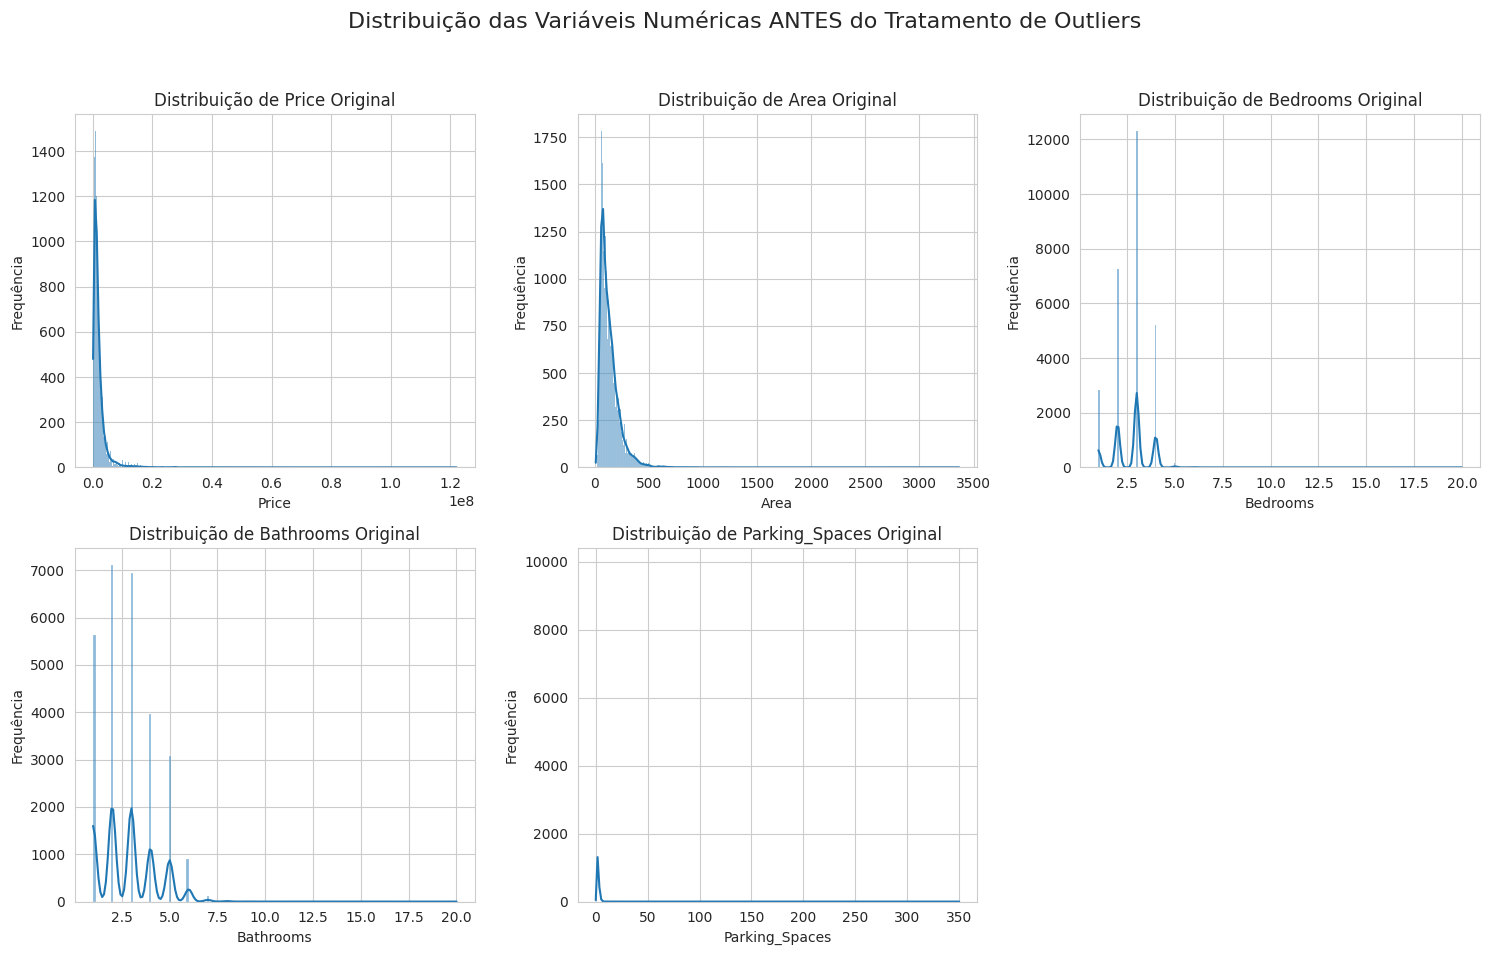

Gráficos da distribuição original salvos como 'distribuicao_original.png'.


In [ ]:
# Célula 10: Visualizar a distribuição ANTES do tratamento de outliers
# Re-carregar o dataset original para garantir que estamos plotando o estado inicial.
df_original = pd.read_csv('SaoPaulo_OnlyAppartments.csv')

cols_to_plot_original = ['Price', 'Area', 'Bedrooms', 'Bathrooms', 'Parking_Spaces']

plt.figure(figsize=(15, 10))
plt.suptitle('Distribuição das Variáveis Numéricas ANTES do Tratamento de Outliers', fontsize=16)

for i, col in enumerate(cols_to_plot_original):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_original[col], kde=True)
    plt.title(f'Distribuição de {col} Original')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.ticklabel_format(style='plain', axis='y') # Evita notação científica no eixo Y

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('distribuicao_original.png')
plt.show()
print("Gráficos da distribuição original salvos como 'distribuicao_original.png'.")

In [ ]:
# Célula 11: Aplicar Capping e Remoções para Outliers
print("\n### Início do Tratamento de Outliers ###")

cols_to_treat = ['Price', 'Area', 'Bedrooms', 'Bathrooms', 'Parking_Spaces']

for col in cols_to_treat:
    print(f"\nTratando outliers para a coluna: **{col}**")

    # Calcular percentis para capping (1% e 99%)
    lower_perc = df[col].quantile(0.01)
    upper_perc = df[col].quantile(0.99)

    # Antes do tratamento (valores originais do df atual)
    print(f"Valores ANTES do capping (min/max): {df[col].min():.2f} / {df[col].max():.2f}")

    # Aplicar capping: valores abaixo do percentil 1% são ajustados para o valor do percentil 1%
    # e valores acima do percentil 99% são ajustados para o valor do percentil 99%.
    df[col] = np.where(df[col] < lower_perc, lower_perc, df[col])
    df[col] = np.where(df[col] > upper_perc, upper_perc, df[col])

    print(f"Valores APÓS capping (min/max): {df[col].min():.2f} / {df[col].max():.2f}")
    print(f"Outliers de {col} contidos via capping.")


### Início do Tratamento de Outliers ###

Tratando outliers para a coluna: **Price**
Valores ANTES do capping (min/max): 100000.00 / 122028988.00
Valores APÓS capping (min/max): 260000.00 / 13500000.00
Outliers de Price contidos via capping.

Tratando outliers para a coluna: **Area**
Valores ANTES do capping (min/max): 10.00 / 3367.00
Valores APÓS capping (min/max): 35.00 / 452.00
Outliers de Area contidos via capping.

Tratando outliers para a coluna: **Bedrooms**
Valores ANTES do capping (min/max): 1.00 / 20.00
Valores APÓS capping (min/max): 1.00 / 4.00
Outliers de Bedrooms contidos via capping.

Tratando outliers para a coluna: **Bathrooms**
Valores ANTES do capping (min/max): 1.00 / 20.00
Valores APÓS capping (min/max): 1.00 / 6.00
Outliers de Bathrooms contidos via capping.

Tratando outliers para a coluna: **Parking_Spaces**
Valores ANTES do capping (min/max): 0.00 / 350.00
Valores APÓS capping (min/max): 1.00 / 6.00
Outliers de Parking_Spaces contidos via capping.


In [ ]:
# Célula 12: Remoções específicas para valores fisicamente improváveis (pós-capping)
initial_rows_before_specific_removal = df.shape[0]

# Remover apartamentos com área muito pequena (ex: menos de 20m² pode ser erro ou estúdio extremo)
df = df[df['Area'] >= 20]
removed_area_rows = initial_rows_before_specific_removal - df.shape[0]
print(f"\nRemovidos {removed_area_rows} linhas com Área < 20m².")

# Remover apartamentos com um número irreal de vagas de estacionamento (ex: mais de 10)
initial_rows_after_area_removal = df.shape[0]
df = df[df['Parking_Spaces'] <= 10]
removed_parking_rows = initial_rows_after_area_removal - df.shape[0]
print(f"Removidos {removed_parking_rows} linhas com Parking_Spaces > 10.")

print(f"\n### Número final de linhas no dataset após remoções específicas: {df.shape[0]} ###")


Removidos 0 linhas com Área < 20m².
Removidos 0 linhas com Parking_Spaces > 10.

### Número final de linhas no dataset após remoções específicas: 27828 ###


In [ ]:
# Célula 13: Re-verificar as estatísticas descritivas após o tratamento de outliers
print("\n### Estatísticas Descritivas Após Tratamento de Outliers: ###")
print(df[cols_to_treat].describe())


### Estatísticas Descritivas Após Tratamento de Outliers: ###
              Price          Area      Bedrooms     Bathrooms  Parking_Spaces
count  2.782800e+04  27828.000000  27828.000000  27828.000000    27828.000000
mean   1.956417e+06    134.931256      2.730236      2.821259        2.111470
std    2.092868e+06     82.677843      0.888102      1.403743        1.106929
min    2.600000e+05     35.000000      1.000000      1.000000        1.000000
25%    7.500000e+05     73.000000      2.000000      2.000000        1.000000
50%    1.319972e+06    112.000000      3.000000      3.000000        2.000000
75%    2.300000e+06    171.000000      3.000000      4.000000        3.000000
max    1.350000e+07    452.000000      4.000000      6.000000        6.000000


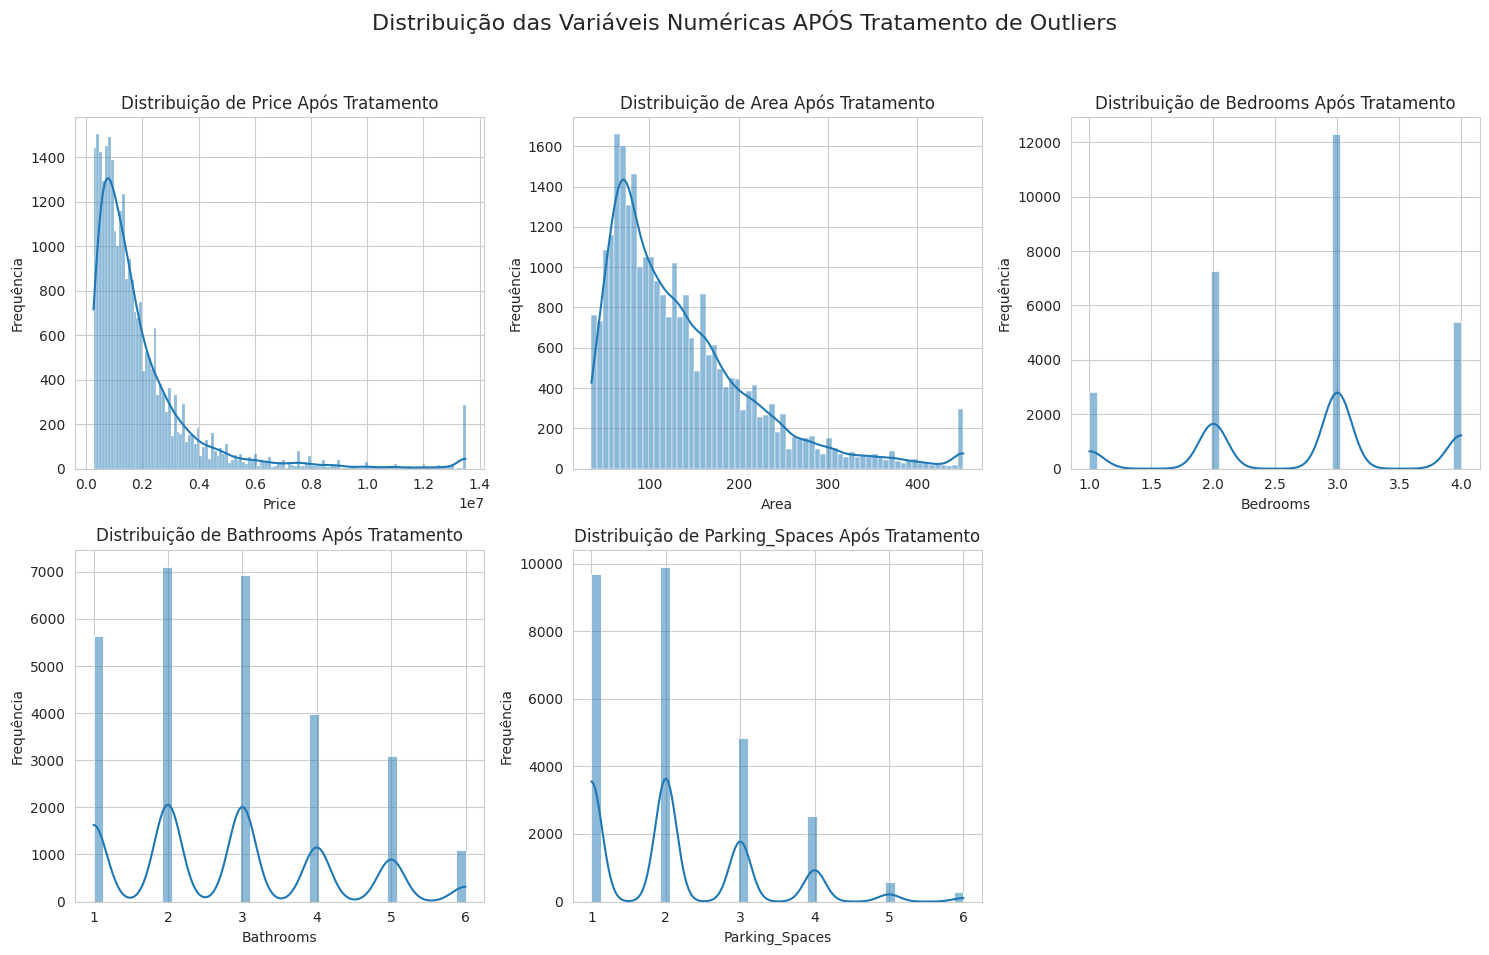

Gráficos da distribuição APÓS tratamento de outliers salvos como 'distribuicao_apos_tratamento.png'.


In [ ]:
# Célula 14: Visualizar a distribuição APÓS o tratamento de outliers
plt.figure(figsize=(15, 10))
plt.suptitle('Distribuição das Variáveis Numéricas APÓS Tratamento de Outliers', fontsize=16)

for i, col in enumerate(cols_to_treat):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col} Após Tratamento')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('distribuicao_apos_tratamento.png')
plt.show()
print("Gráficos da distribuição APÓS tratamento de outliers salvos como 'distribuicao_apos_tratamento.png'.")

### 3.4. Limpeza da Categoria 'Desconhecido' na Coluna Bairro

A extração do bairro resultou em alguns valores 'Desconhecido', que representam endereços em formatos não identificados pela nossa lógica. Para garantir a qualidade da análise de localização, estas linhas serão removidas.

In [ ]:
# Célula 15: Remover linhas onde a coluna 'Bairro' é 'Desconhecido'
print("\n### Tratamento de Bairros 'Desconhecido' ###")

initial_rows_bairro = df.shape[0]
print(f"Número de linhas antes da remoção de Bairro 'Desconhecido': {initial_rows_bairro}")
print(f"Contagem original de 'Desconhecido': {df['Bairro'].value_counts().get('Desconhecido', 0)}")

df = df[df['Bairro'] != 'Desconhecido']
removed_rows_bairro = initial_rows_bairro - df.shape[0]

print(f"Número de linhas removidas com Bairro 'Desconhecido': {removed_rows_bairro}")
print(f"Novo número de linhas no dataset: {df.shape[0]}")


### Tratamento de Bairros 'Desconhecido' ###
Número de linhas antes da remoção de Bairro 'Desconhecido': 27828
Contagem original de 'Desconhecido': 1778
Número de linhas removidas com Bairro 'Desconhecido': 1778
Novo número de linhas no dataset: 26050


In [ ]:
# Célula 16: Verificar os 10 bairros mais frequentes após a remoção
print("\n### Top 10 Bairros após remoção de 'Desconhecido':")
print(df['Bairro'].value_counts().head(10))
print(f"Nova contagem de 'Desconhecido' (deve ser 0): {df['Bairro'].value_counts().get('Desconhecido', 0)}")


### Top 10 Bairros após remoção de 'Desconhecido':
Bairro
Jardim Paulista        1113
Perdizes               1055
Vila Mariana            967
Indianópolis            885
Campo Belo              738
Itaim Bibi              701
Vila Nova Conceição     610
Brooklin Paulista       550
Vila Andrade            540
Vila Olímpia            523
Name: count, dtype: int64
Nova contagem de 'Desconhecido' (deve ser 0): 0


### 3.5. Criação da Métrica 'Preço por Metro Quadrado' (Price_per_sqm)

Para comparar o valor de imóveis de diferentes tamanhos de forma justa e analisar a influência da localização, o preço por metro quadrado (`Price_per_sqm`) é uma métrica essencial.

In [ ]:
# Célula 17: Calcular a coluna 'Price_per_sqm'
# Adicionar um pequeno valor (1e-6) à área para evitar divisão por zero, caso alguma área seja 0.
# Embora já tenhamos removido áreas muito pequenas, é uma boa prática defensiva.
df['Price_per_sqm'] = df['Price'] / (df['Area'] + 1e-6)

print("\n### Estatísticas Descritivas para 'Price_per_sqm':")
print(df['Price_per_sqm'].describe())


### Estatísticas Descritivas para 'Price_per_sqm':
count     26050.000000
mean      13489.537626
std        7557.417445
min         627.906975
25%        8571.428327
50%       11761.091274
75%       16216.216070
max      162650.600450
Name: Price_per_sqm, dtype: float64


/tmp/ipython-input-53-3963557015.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price_per_sqm'] = df['Price'] / (df['Area'] + 1e-6)


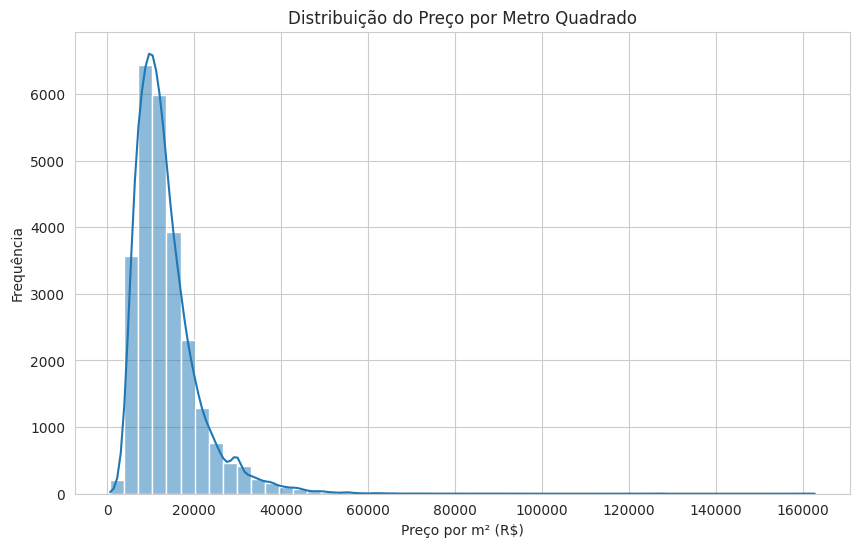

Distribuição do Preço por m² salva como 'distribuicao_preco_por_m2.png'.


In [ ]:
# Célula 18: Visualizar a distribuição do Preço por Metro Quadrado
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_per_sqm'], kde=True, bins=50)
plt.title('Distribuição do Preço por Metro Quadrado')
plt.xlabel('Preço por m² (R$)')
plt.ylabel('Frequência')
plt.ticklabel_format(style='plain', axis='x')
plt.savefig('distribuicao_preco_por_m2.png')
plt.show()
print("Distribuição do Preço por m² salva como 'distribuicao_preco_por_m2.png'.")

## 4. Análise Exploratória de Dados (EDA) e Insights

Com o dataset limpo e preparado, podemos agora explorar as relações entre as variáveis e extrair insights para responder às nossas questões de pesquisa.

### 4.1. Correlação entre Variáveis Numéricas

A matriz de correlação nos ajuda a identificar quais características numéricas têm maior relação linear com o preço dos imóveis. Valores próximos a 1 indicam forte correlação positiva, e próximos a -1, forte correlação negativa.

### Matriz de Correlação das Variáveis Numéricas:
                        Price      Area  Bedrooms  Bathrooms  Parking_Spaces  \
Price                1.000000  0.736092  0.347398   0.513659        0.617185   
Area                 0.736092  1.000000  0.597590   0.657286        0.728104   
Bedrooms             0.347398  0.597590  1.000000   0.541356        0.472496   
Bathrooms            0.513659  0.657286  0.541356   1.000000        0.589612   
Parking_Spaces       0.617185  0.728104  0.472496   0.589612        1.000000   
age_of_listing_days -0.016571 -0.005670  0.014164  -0.005137       -0.010375   
Price_per_sqm        0.722743  0.225352 -0.046043   0.234927        0.275002   

                     age_of_listing_days  Price_per_sqm  
Price                          -0.016571       0.722743  
Area                           -0.005670       0.225352  
Bedrooms                        0.014164      -0.046043  
Bathrooms                      -0.005137       0.234927  
Parking_Spaces     

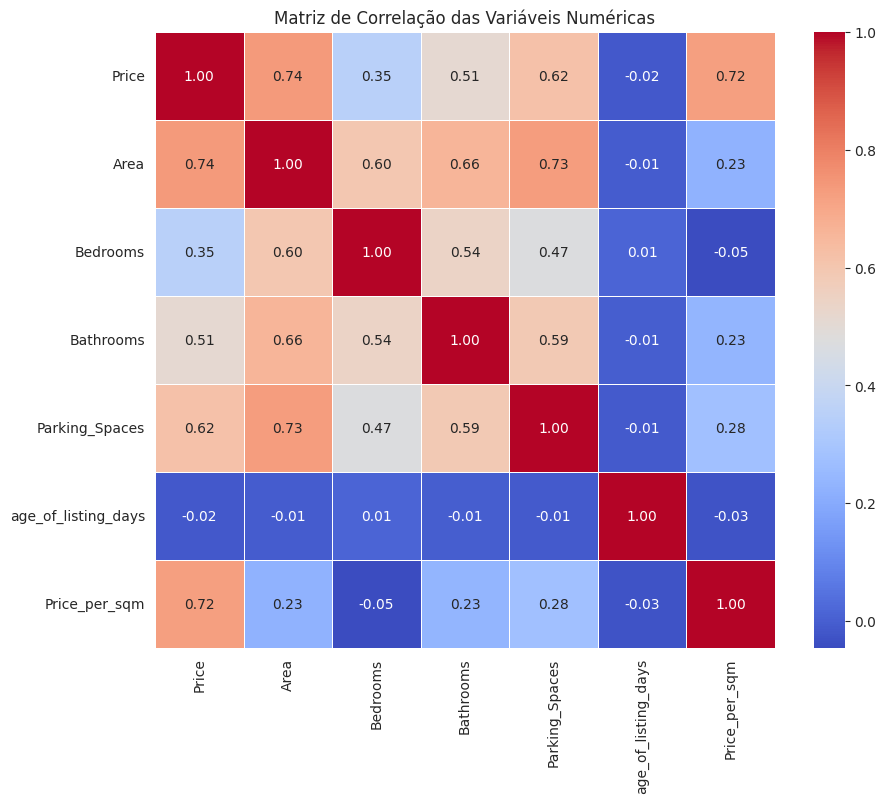

Matriz de Correlação salva como 'matriz_correlacao.png'.


In [ ]:
# Célula 19: Calcular e visualizar a matriz de correlação
# Selecionar apenas as colunas numéricas relevantes para análise de correlação
numerical_cols_for_corr = ['Price', 'Area', 'Bedrooms', 'Bathrooms', 'Parking_Spaces', 'age_of_listing_days', 'Price_per_sqm']

# Calcular a matriz de correlação
correlation_matrix = df[numerical_cols_for_corr].corr()
print("### Matriz de Correlação das Variáveis Numéricas:")
print(correlation_matrix)

# Visualizar a matriz de correlação com um heatmap para melhor interpretação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.savefig('matriz_correlacao.png')
plt.show()
print("Matriz de Correlação salva como 'matriz_correlacao.png'.")

### 4.2. Impacto das Características do Imóvel no Preço

Os gráficos de dispersão nos permitem visualizar diretamente a relação entre o preço e as principais características dos imóveis, confirmando as observações da matriz de correlação.

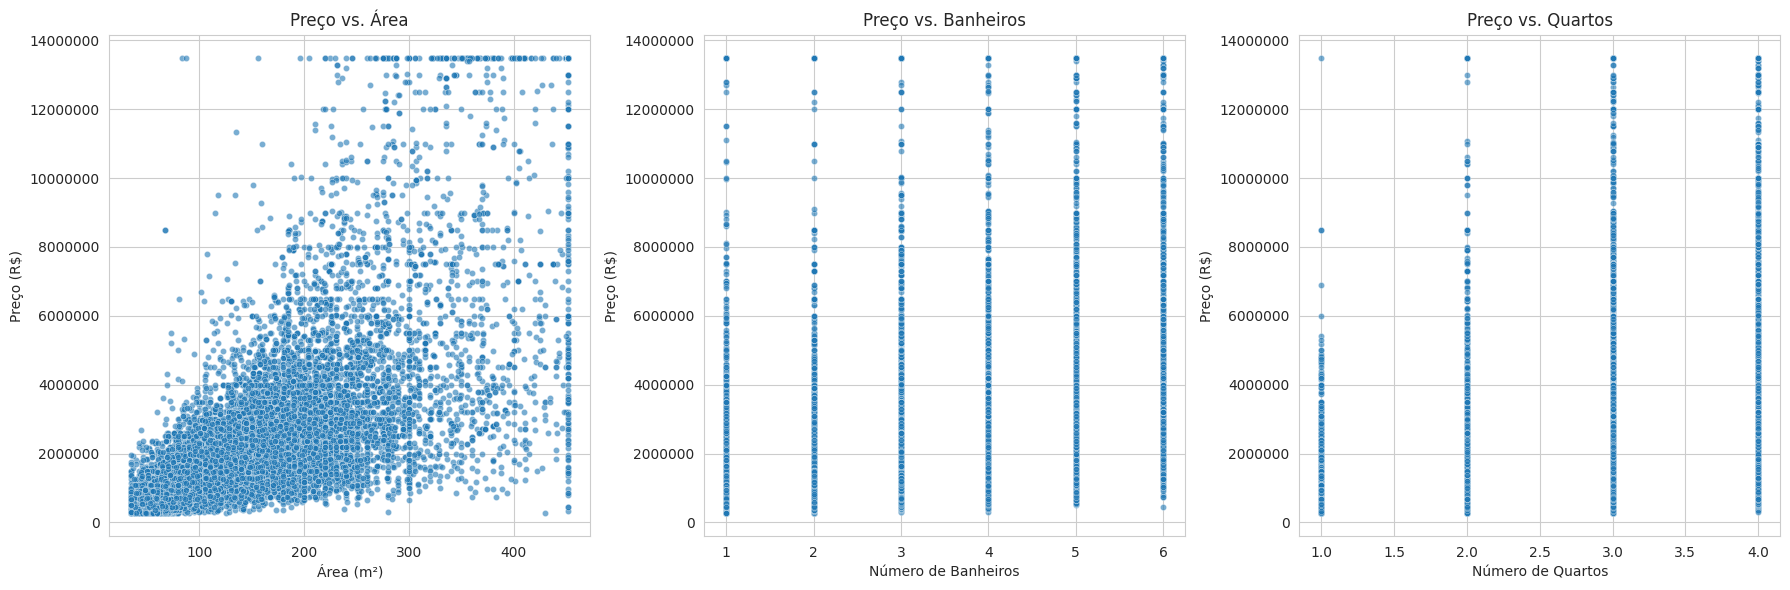

Gráficos de Preço vs. Características salvos como 'preco_vs_caracteristicas.png'.


In [ ]:
# Célula 20: Gráficos de dispersão (scatter plots) para as variáveis mais correlacionadas com o Preço
plt.figure(figsize=(18, 6))

# Preço vs. Área: Espera-se uma relação positiva forte.
plt.subplot(1, 3, 1)
sns.scatterplot(x='Area', y='Price', data=df, alpha=0.6, s=20) # s=20 para tamanho dos pontos
plt.title('Preço vs. Área')
plt.xlabel('Área (m²)')
plt.ylabel('Preço (R$)')
plt.ticklabel_format(style='plain', axis='y') # Evita notação científica no eixo Y

# Preço vs. Banheiros: Espera-se uma relação positiva.
plt.subplot(1, 3, 2)
sns.scatterplot(x='Bathrooms', y='Price', data=df, alpha=0.6, s=20)
plt.title('Preço vs. Banheiros')
plt.xlabel('Número de Banheiros')
plt.ylabel('Preço (R$)')
plt.ticklabel_format(style='plain', axis='y')

# Preço vs. Quartos: Espera-se uma relação positiva.
plt.subplot(1, 3, 3)
sns.scatterplot(x='Bedrooms', y='Price', data=df, alpha=0.6, s=20)
plt.title('Preço vs. Quartos')
plt.xlabel('Número de Quartos')
plt.ylabel('Preço (R$)')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.savefig('preco_vs_caracteristicas.png')
plt.show()
print("Gráficos de Preço vs. Características salvos como 'preco_vs_caracteristicas.png'.")

### 4.3. A Influência da Localização (Bairro) no Preço

A localização é um dos fatores mais críticos no mercado imobiliário. Analisaremos como o preço por metro quadrado varia entre os diferentes bairros de São Paulo.


### Top 10 Bairros com maior preço médio por m²:
Bairro
Jardim Pantanal                   43010.752457
Jardim Nova Vitória I             42741.935254
Ibirapuera                        41782.810924
Jardim Panorama                   31498.533272
Jardim Panorama (Zona Oeste)      31215.008420
Jardim Guedala                    29867.256571
Cidade Jardim                     28633.295383
Jardim América                    28525.009674
Jardim Catanduva                  27964.136567
Jardim Paulistano (Zona Oeste)    26225.277741
Name: Price_per_sqm, dtype: float64

### Top 10 Bairros com menor preço médio por m²:
Bairro
Jardim Tiro ao Pombo            3899.999941
Guapira                         3741.950253
Jardim Patente                  3679.968245
Vila Alzira                     3601.503732
Jardim São Paulo(Zona Leste)    3361.428522
Vila Caiúba                     3249.999959
Vila Arriete                    3199.999968
Vila Erna                       3161.471185
Vila Bancária               

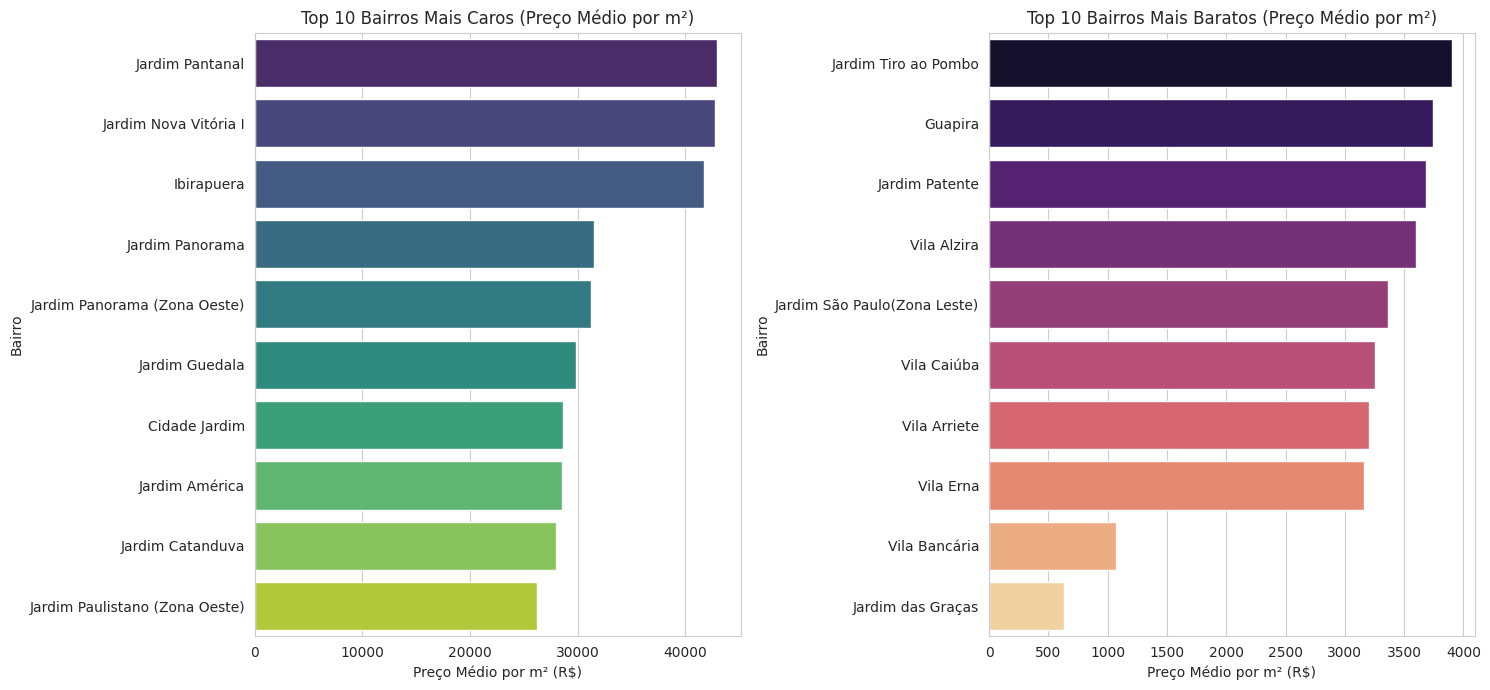

Gráficos dos Top Bairros por Preço por m² salvos como 'top_bairros_preco_m2.png'.


In [ ]:
# Célula 21: Top 10 Bairros com maior e menor preço médio por m²
# Calcular o preço médio por metro quadrado para cada bairro
price_per_sqm_by_bairro = df.groupby('Bairro')['Price_per_sqm'].mean().sort_values(ascending=False)

print("\n### Top 10 Bairros com maior preço médio por m²:")
print(price_per_sqm_by_bairro.head(10))

print("\n### Top 10 Bairros com menor preço médio por m²:")
print(price_per_sqm_by_bairro.tail(10))

# Visualizar os 10 bairros mais caros e os 10 mais baratos em termos de preço por m²
plt.figure(figsize=(15, 7))

# Top 10 Bairros mais caros
plt.subplot(1, 2, 1)
# Usando 'hue' e 'legend=False' para evitar FutureWarning
sns.barplot(x=price_per_sqm_by_bairro.head(10).values, y=price_per_sqm_by_bairro.head(10).index,
            palette='viridis', hue=price_per_sqm_by_bairro.head(10).index, legend=False)
plt.title('Top 10 Bairros Mais Caros (Preço Médio por m²)')
plt.xlabel('Preço Médio por m² (R$)')
plt.ylabel('Bairro')
plt.ticklabel_format(style='plain', axis='x')

# Top 10 Bairros mais baratos
plt.subplot(1, 2, 2)
# Usando 'hue' e 'legend=False' para evitar FutureWarning
sns.barplot(x=price_per_sqm_by_bairro.tail(10).values, y=price_per_sqm_by_bairro.tail(10).index,
            palette='magma', hue=price_per_sqm_by_bairro.tail(10).index, legend=False)
plt.title('Top 10 Bairros Mais Baratos (Preço Médio por m²)')
plt.xlabel('Preço Médio por m² (R$)')
plt.ylabel('Bairro')
plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.savefig('top_bairros_preco_m2.png')
plt.show()
print("Gráficos dos Top Bairros por Preço por m² salvos como 'top_bairros_preco_m2.png'.")

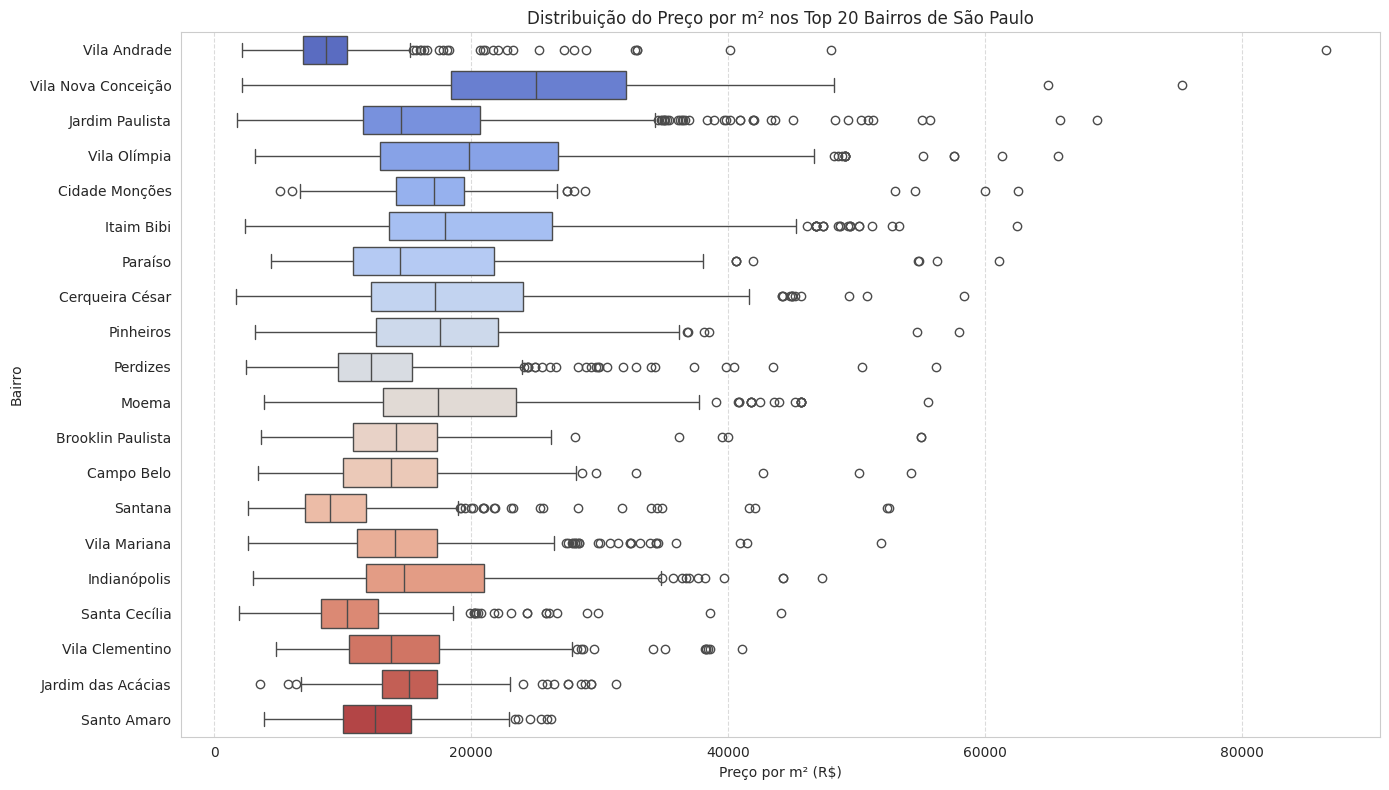

Box plot do Preço por m² nos Top 20 Bairros salvo como 'boxplot_preco_m2_top_bairros.png'.


In [ ]:
# Célula 22: Box plot da distribuição do Preço por m² nos Top 20 Bairros (mais detalhado)
# Selecionar os 20 bairros com mais apartamentos no dataset para o box plot (melhor representatividade)
top_20_bairros = df['Bairro'].value_counts().head(20).index
df_top_bairros = df[df['Bairro'].isin(top_20_bairros)]

plt.figure(figsize=(14, 8))
# Usando 'hue' e 'legend=False' para evitar FutureWarning
sns.boxplot(x='Price_per_sqm', y='Bairro', data=df_top_bairros.sort_values('Price_per_sqm', ascending=False),
            palette='coolwarm', hue='Bairro', legend=False)
plt.title('Distribuição do Preço por m² nos Top 20 Bairros de São Paulo')
plt.xlabel('Preço por m² (R$)')
plt.ylabel('Bairro')
plt.ticklabel_format(style='plain', axis='x')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('boxplot_preco_m2_top_bairros.png')
plt.show()
print("Box plot do Preço por m² nos Top 20 Bairros salvo como 'boxplot_preco_m2_top_bairros.png'.")

## 5. Conclusões Finais

Nesta seção, consolidamos as principais descobertas da nossa análise de dados sobre o setor imobiliário de São Paulo, respondendo às questões de pesquisa propostas.

* **A Importância da Preparação de Dados:** As etapas de limpeza e organização (conversão de datas, extração de texto e tratamento de outliers) foram cruciais. Como demonstrado pelos gráficos "antes" e "depois" do tratamento de outliers, a qualidade da análise foi significativamente melhorada ao lidar com dados inconsistentes e extremos. Sem essa etapa, as conclusões poderiam ser severamente distorcidas.

* **Influência das Características do Imóvel no Preço:**
    * A **área do imóvel** (`Area`) é, de longe, o fator mais fortemente correlacionado com o preço, demonstrando que apartamentos maiores tendem a ser consideravelmente mais caros.
    * O número de **banheiros** (`Bathrooms`), **quartos** (`Bedrooms`) e **vagas de estacionamento** (`Parking_Spaces`) também apresentam correlações positivas significativas com o preço. Esses atributos são indicadores de tamanho e amenidades, confirmando que imóveis com mais recursos e espaço são valorizados.

* **A Influência Predominante da Localização (Bairro):**
    * A análise do **preço por metro quadrado** (`Price_per_sqm`) revelou uma disparidade abismal entre os bairros de São Paulo. Bairros de alto padrão como Jardim Pantanal e Ibirapuera mostram um valor médio por m² que pode ser dezenas de vezes maior do que em bairros mais acessíveis como Jardim das Graças e Vila Bancária.
    * O Box Plot ilustrou não apenas a diferença nas medianas entre os bairros, mas também a **variabilidade de preços dentro de um mesmo bairro**. Isso aponta para a complexidade do mercado, onde fatores micro-localizacionais (proximidade a parques, escolas, comércio, transporte) podem gerar grandes diferenças de valor mesmo em regiões consideradas homogêneas.

* **Insights sobre o Tempo de Anúncio:**
    * A coluna `age_of_listing_days` (idade do anúncio) mostrou uma correlação linear muito baixa com o preço do imóvel. Isso sugere que, ao menos de forma linear, o tempo que um anúncio permanece online não é um fator determinante para a variação do preço final, indicando que outros fatores são mais preponderantes.

* **A Presença e Influência dos Dados no Setor Imobiliário:**
    * Conclui-se que os dados são um ativo indispensável no setor imobiliário. Eles permitem uma compreensão aprofundada do mercado, desde a avaliação precisa de propriedades (levando em conta características e localização) até a identificação de tendências, otimização de estratégias de venda/aluguel e a tomada de decisões de investimento mais informadas. A capacidade de coletar, organizar e analisar esses dados confere uma vantagem competitiva significativa para todos os atores do mercado.

Este estudo demonstra como um ciclo de ciência de dados, quando bem executado, pode transformar dados brutos em inteligência de negócios valiosa.